# Testing plotting and rotation in galactic coords

Based on the code in figures_TA_SBG_data notebook.

In [2]:
import numpy as np
import matplotlib as mpl
from astropy.coordinates import SkyCoord
import astropy.units as u

from fancy.interfaces import Data
from fancy.plotting import AllSkyMapCartopy 
from fancy.plotting import AllSkyMap 
from fancy.plotting.colours import (lightblue, midblue, midblue_contour, darkblue, 
                                    purple, grey)
from fancy.interfaces.stan import Direction

Define what to plot and load data

In [3]:
source_file = "../../data/sourcedata.h5"
uhecr_file = "../../data/UHECRdata.h5"

source_type = "SBG_23"
detector_type = "TA2015"
gmf_type = "JF12"
ptype = "p"

In [4]:
if detector_type == "TA2015":
    from fancy.detector.TA2015 import detector_properties
elif detector_type == "auger2014":
    from fancy.detector.auger2014 import detector_properties
elif detector_type == "auger2010":
    from fancy.detector.auger2010 import detector_properties
else:
    raise Exception("Undefined detector type!")

In [5]:
data = Data()

data.add_source(source_file, source_type)
data.add_uhecr(uhecr_file, detector_type)
data.add_detector(detector_properties)

source_direction = Direction(data.source.unit_vector)
arrival_direction = Direction(data.uhecr.unit_vector)
energy = data.uhecr.energy

Plotting helpers

In [6]:
# Legend
legend_elements = [mpl.lines.Line2D([0], [0], marker = 'o', color = 'w', 
                                    label = source_type, markersize = 10, 
                                    markerfacecolor = 'k'),
                   mpl.lines.Line2D([0], [0], marker = 'o', color='w', 
                                    label = 'UHECRs', markersize = 15, 
                                    markerfacecolor = midblue, alpha = 0.8)]

# UHECRs
uhecr_color = [lightblue, midblue, darkblue]
uhecr_cmap = mpl.colors.ListedColormap(uhecr_color)
energy_bins = np.logspace(np.log(57), np.log(170), 4, base = np.e)
uhecr_norm = mpl.colors.BoundaryNorm(energy_bins, uhecr_cmap.N)

Plot the TA dataset and exposure

In [7]:
# Exposure
num_points = 1_000
rightascensions = np.linspace(-180, 180, num_points)
limiting_dec = data.detector.limiting_dec.deg
boundary_decs = np.tile(limiting_dec, num_points)
c = SkyCoord(ra = rightascensions * u.degree,
             dec = boundary_decs * u.degree, frame = 'icrs')
exp_lon = c.galactic.l.deg
exp_lat = c.galactic.b.deg

Cartopy version

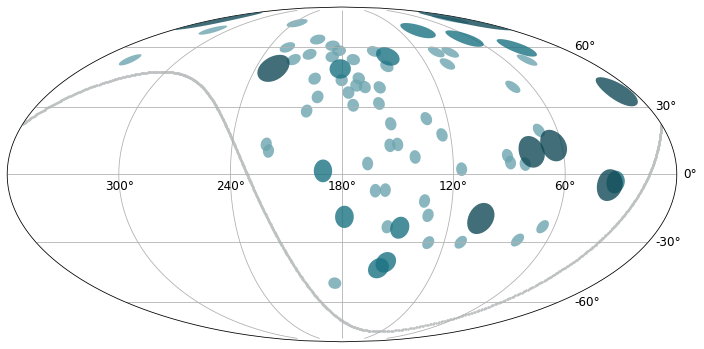

In [14]:
skymap = AllSkyMapCartopy(lon_0=180)
skymap.set_gridlines(dx=60, ypadding=10)

# UHECRs
for lon, lat, E in np.nditer([arrival_direction.glons, arrival_direction.glats, energy]):
    i = np.digitize(E, energy_bins) - 1
    skymap.tissot(lon, lat, 3.0 + (i*2), 
                  facecolor = uhecr_cmap.colors[i], npts=30, lw=0, 
                  alpha = 0.8, zorder = i+2)

# exposure edge
skymap.scatter(exp_lon, exp_lat, s = 2,
               color = grey, alpha = 1)

ligo.skymap version:

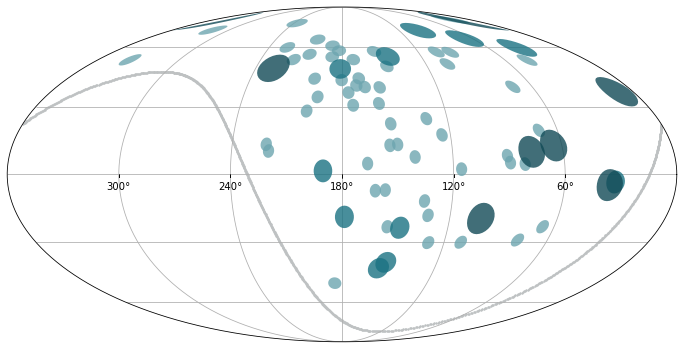

In [9]:
skymap = AllSkyMap(lon_0=180)
skymap.set_gridlines(ytick_pos="h", xlims=[0,360])

# UHECRs
for lon, lat, E in np.nditer([arrival_direction.glons, arrival_direction.glats, energy]):
    i = np.digitize(E, energy_bins) - 1
    skymap.tissot(lon, lat, 3.0 + (i*2), 
                  facecolor = uhecr_cmap.colors[i], npts=30, lw=0, 
                  alpha = 0.8, zorder = i+2)

# exposure edge
skymap.scatter(exp_lon, exp_lat, s = 2,
               color = grey, alpha = 1)

What if we want to rotate to lon_0 = 0? there is *only one place* we need to make this change, when creating the skymap with `AllSkyMap` or `AllSkyMapCartopy`. Examples for both cases below:

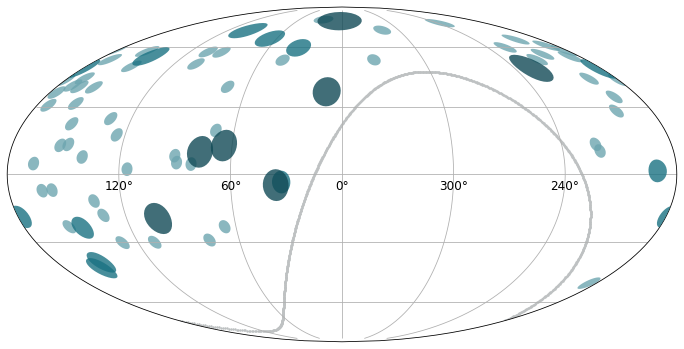

In [10]:
skymap = AllSkyMapCartopy(lon_0=0, figsize=(12,7)) # only change here!
skymap.set_gridlines(ypadding=10, draw_ylabels=False)

# UHECRs
for lon, lat, E in np.nditer([arrival_direction.glons, arrival_direction.glats, energy]):
    i = np.digitize(E, energy_bins) - 1
    skymap.tissot(lon, lat, 3.0 + (i*2), 
                  facecolor = uhecr_cmap.colors[i], npts=30, lw=0, 
                  alpha = 0.8, zorder = i+2)

# exposure edge
skymap.scatter(exp_lon, exp_lat, s = 2,
               color = grey, alpha = 1)

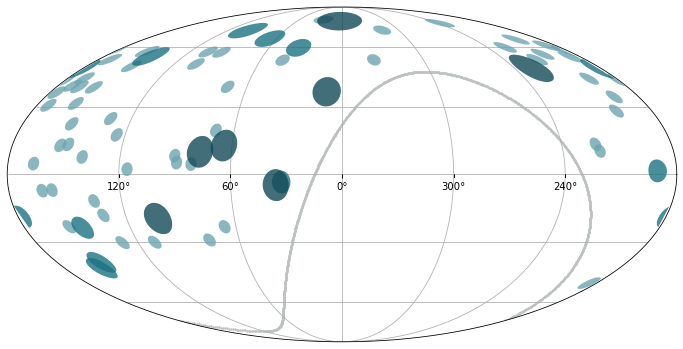

In [11]:
skymap = AllSkyMap(lon_0=0) # only change here!
skymap.set_gridlines(ytick_pos="h", xlims=[-180,180])  # needed for gridlines to behave properly

# UHECRs
for lon, lat, E in np.nditer([arrival_direction.glons, arrival_direction.glats, energy]):
    i = np.digitize(E, energy_bins) - 1
    skymap.tissot(lon, lat, 3.0 + (i*2), 
                  facecolor = uhecr_cmap.colors[i], npts=30, lw=0, 
                  alpha = 0.8, zorder = i+2)

# exposure edge
skymap.scatter(exp_lon, exp_lat, s = 2,
               color = grey, alpha = 1)